# TMA4320 - Prosjekt 2
av Thomas Parelius
## Discretized Schrödinger's equation in one dimension

Time independent Schrödinger's equation has the form
$$
H\psi=E\psi
$$
where $H$ is the Hamiltonian, $\psi$ the wave function and $E$ the energy of the particle. 

In one dimension, for a particle of mass $m$, it can be written as
$$
-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2}+V(x)\psi(x)=E\psi(x)
$$
where, $V(x)$ is the external potential.
Discretizing along the $x$ axis such that $\psi_n=\psi(x_n)=\psi(n \cdot \Delta x)$ and $V_n=V(n \cdot \Delta x)$, and using a central difference for the second derivative of $\psi$, we get a discretized version of Schrödinger's equation:
$$
-\frac{\hbar^2}{2m}\frac{\psi_{n+1}-2\psi_n+\psi_{n-1}}{(\Delta x)^2}+V_n\psi_n=E\psi_n
$$

## Numerical solution
We define an interval $[0,L]$ along the $x$-axis where the electron can be located. The interval is discretized as shown above so that $x=n\cdot \Delta x$, $n=0,1,2 ... N+1$. At the limits of the interval $x=0$ and $x=L$ which corresponds to $n=0$ and $n=N+1$ the potential $V_0$ and $V_{N+1}$ is infinity, so that the wave function $\psi$ is zero at the limits. 

The discretized Schrödinger's equation can be written in a matrix form:
$$
H\psi=E\psi
$$
where $H$ is a tridiagonal symmetrical matrix with diagonal elements
$$
H_{nn}=\frac{\hbar^2}{m(\Delta x)^2}+V_n
$$
and under and over the diagonal
$$
H_{n,n+-1}=-\frac{\hbar^2}{2m(\Delta x)^2}
$$
or
$$
H = \left[
\begin{array}{rrrrrrr}
H_{nn} & H_{n,n+-1} & 0 &  \cdots & 0  \\
H_{n,n+-1}&  H_{nn} & H_{n,n+-1}    &   \ddots      & \vdots \\
0 & \ddots & \ddots & \ddots & 0 \\
\vdots &\ddots & \ddots &\ddots & H_{n,n+-1} \\
0 &\cdots & 0 & H_{n,n+-1} & H_{nn}
\end{array} 
\right]
$$

The time independent Schrödinger's equation in this form is a straightforward eigenvalue problem which can be solved numerically.

We know that the eigenfunctions/wave functions $\psi$ have to be normalized (because the square of the absolute value of $\psi$ is the probability of a particle being in a given spot and the total probability over the whole space cannot be larger than 1), they are also orthogonal and form a complete set. 

In order to simplify the calculations and make sure the constants are not too small, we will use the Hartree atomic units, where the mass of the electron $m_e$, the elementary charge $e$, the reduced Planck constant $\hbar$ and Coulomb's constant $k_e$ are set to one. 
As a result the length will be in Bohr radii $(1\ a_0=0.0529 \ \rm{nm})$ and the energy in hartrees $(1\ Eh= 27,211\ \rm{eV})$

In [2]:
import numpy as np
import scipy as scipy
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

def isNormal(psi,err=1e-14):
    '''
    Function that takes a NxN matrix of wave functions psi. 
    Psi_n,j is the value at x=x_n for the wave function number j 
    Returns a boolean value stating whether the wave functions in the set 
    are normalized
    '''
    N=np.size(psi,axis=0)
    norms=np.sum(psi*psi,axis=0)
    norms[(norms-1<err) & (norms-1>-err)]=1
    return (norms==np.ones(N)).all()

def isOrthog(psi,err=1e-14):
    '''
    Function that takes a NxN matrix of wave functions psi. 
    Psi_n,j is the value at x=x_n for the wave function number j 
    Returns a boolean value stating whether the wave functions
    are orthogonal
    '''
    N=np.size(psi,axis=0)
    ort=np.zeros([N,N])
    for k in range(N):
        for j in range(N):
            ort[k,j]=np.sum(psi[:,k]*psi[:,j])
    ort[(ort<err) & (ort>-err)]=0
    ort[(ort-1<err) & (ort-1>-err)]=1
    return (ort==np.eye(N)).all()

def isCompleteSet(psi,err=1e-14):
    '''
    Function that takes a NxN matrix of wave functions psi. 
    Psi_n,j is the value at x=x_n for the wave function number j 
    Returns a boolean value stating whether the wave functions
    form a complete set
    '''
    N=np.size(psi,axis=0)
    cs=np.zeros([N,N])
    for n in range(N):
        for k in range(N):
            cs[n,k]=np.sum(psi[n,:]*psi[k,:])

    cs[(cs<err) & (cs>-err)]=0
    cs[(cs-1<err) & (cs-1>-err)]=1
    return (cs==np.eye(N)).all()

def solveSchr(L,V,hbar=1,m=1):
    '''
    Function that calculates
        w - the eigenvalues (energies)  and
        psi - the eigenfunctions (wavefunctions)
    that satisfy the Schrodinger equation defined by
        L - an interval [0, L] and
        V - an array specifying the external potential on [0, L]
        
        hbar=1  reduced planck constant in atomic units
        m=1  particle/electron mass in atomic units
    '''
    N=len(V)-2
    h=L/(N+1)
    
    w=np.zeros(N+2) # eigenvalues
    psi=np.zeros([N+2,N+2]) # eigenfunctions
    
    d=hbar**2/m/h**2*np.ones(N+2)+V # diagonal elements
    ofd=-hbar**2/2/m/h**2*np.ones(N+1) # off-diagonal elements
    w, psi=linalg.eigh_tridiagonal(d,ofd)
    return w, psi



## Oppgave 1
In the first exercise, we implement the algorithm to numerically find the energy states and their corresponding wave functions and test in on a case of a particle in a box, which has simple analytical solutions that can be used to assess the accuracy of our algorithm. 

The wave functions are normalized:  True
The wave functions are orthogonal:  True
The wave functions form a complete set:  True
Analytical and numerical values for energy states:
[0.04934802 0.19739209 0.4441322  0.78956835 1.23370055]
[0.04930577 0.19671714 0.44072148 0.77881497 1.20752832]
Relative error in %:  [-0.1 -0.3 -0.8 -1.4 -2.1]


Text(0.5, 1.0, 'Numerical')

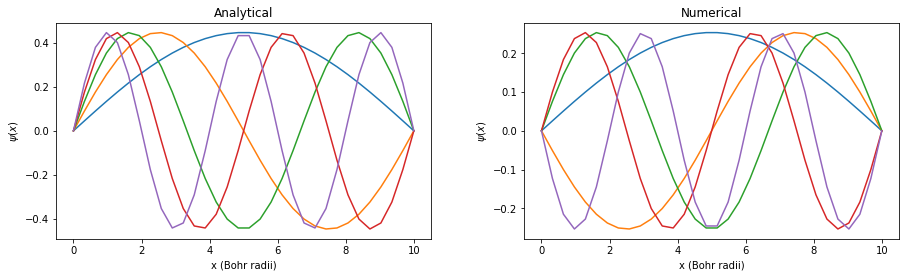

In [3]:
N=30 # number of points, without the boundary points
L=10 # length of the interval [0,L], in Bohr radii (0.053 nm)

hbar1=1
m=1 

n=np.arange(N+2) # step count
h=L/(N+1) # step size
x=h*n # x axis

# Setting up the potential
V=np.zeros(N+2)
V[0]=1e6
V[N+1]=1e6

#----------------------------
# Analytical solution
n_eig=5
psi_an=np.zeros([N+2,n_eig])
E_an=np.zeros([n_eig])
for j in range(1,n_eig+1):
    kj=j*scipy.pi/L
    psi_an[:,j-1]=scipy.sqrt(2/L)*scipy.sin(kj*x)
    E_an[j-1]=kj**2*hbar1**2/(2*m)

#-----------------------------
# Numerical solution
E_n, psi=solveSchr(L,V)

# Checking normalization, ortogonality and completeness
print("The wave functions are normalized: ", isNormal(psi))
print("The wave functions are orthogonal: ", isOrthog(psi,1e-12))
print("The wave functions form a complete set: ", isCompleteSet(psi))

#------------------------------
print("Analytical and numerical values for energy states:")
print(E_an)
print(E_n[0:n_eig])
err=np.round((E_n[0:n_eig]-E_an)/E_an,3)
print("Relative error in %: ", err*100)
#--------------------------------
# Plotting
fig=plt.figure(figsize=[13,3])
axAn=fig.add_axes([0.05,0,0.4,1])
for j in range(n_eig):
    axAn.plot(x,psi_an[:,j])
axAn.set_xlabel("x (Bohr radii)")
axAn.set_ylabel("$\psi(x)$")
axAn.set_title("Analytical")
    
axN=fig.add_axes([0.55,0,0.4,1])
for j in range(5):
    axN.plot(x,psi[:,j])
axN.set_xlabel("x (Bohr radii)")
axN.set_ylabel("$\psi(x)$")
axN.set_title("Numerical")

## Oppgave 2
In this exercise, we have a potential well of finite depth which can approximate an atom. We find a depth and width that gives 3 bound states. 

In [5]:
def createPotential(w_well,V_well,n_wells,w_between,points_per1):
    '''
    Function that takes
        w_well - the width of the potential well
        V_well - the potential/depth of the potential well
        n_wells - the number of wells
        w_between - the length of the area of 0 potential between wells
        points_per1 - the desired sampling rate per unit length
    It returns
        L - [0, L] the interval of x were the calculations are being done
        x - the spatial array x
        V - the array giving the potential at each x, creating the
            required potential wells
    '''
    L=n_wells*w_well+(n_wells-1)*w_between+20*w_well
    N=int(L)*points_per1          # number of points
    h=L/(N+1)                # step size
    x=h*np.arange(N+2)       # x array
    V=np.zeros(N+2)          # V array
    
    V[0]=1e6
    V[N+1]=1e6
    
    for i in range(n_wells):
        V[(x>=10*w_well+i*(w_well+w_between)) 
          & (x<=11*w_well+i*(w_well+w_between))]=V_well
    return L,x,V


First 10 energies:  [-2.66893083 -1.7198081  -0.36155051  0.0053887   0.00570297  0.02154429
  0.02278053  0.04843517  0.05114618  0.08600844]
The wave functions are normalized:  True
The wave functions are orthogonal:  True
The wave functions form a complete set:  True


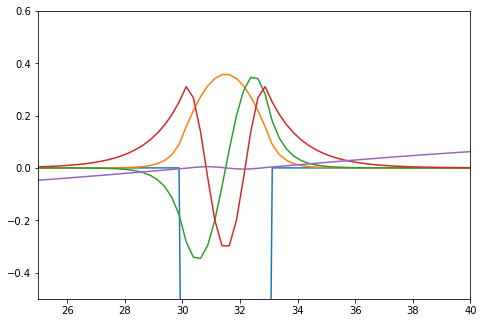

In [7]:
w=3       # width of the well in Bohr radii
V0=-3     # potential in the well in Hartree energy units

# Creating the potential and getting 
# the end of the interval [0, L]
# the distance array x
# the potentials V
L,x,V=createPotential(w,V0,1,0,4) 

# Calculating the energies and wave functions
ev2, psi=solveSchr(L,V)
print("First 10 energies: ",ev2[0:10])

# Plotting
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x[1:-2],V[1:-2])
for j in range(4):
    ax.plot(x,psi[:,j])
    ax.set_xlim([25,40])
    ax.set_ylim([-0.5,0.6])
print("The wave functions are normalized: ", isNormal(psi,1e-6))
print("The wave functions are orthogonal: ", isOrthog(psi,1e-6))
print("The wave functions form a complete set: ", isCompleteSet(psi,1e-6))

### a)
From the plots we can see that the functions for the 3 bound states have the expected parity with the first and third state being even and the second odd. Since the well is symmetrical, the wave functions have to be as well, so they must be either even or odd. We can also see that the ground state has 0 nodes within the well, the next state has 1 and the third one two, just as expected. 

For the unbound states, we see oscillations within the well. Outside of the well the solution does not quite correspond to our expectations, because of the hard walls that are at the edges of the interval. The energies are increasing much slower than for the bound states and the quantization is probably because of the hard walls at the edges. The wavelengths of the unbound wavefunctions inside the well are changing very slowly (see below).

The wavelength of a free particle is given by its kinetic energy $E_k$ by
$$
\lambda=\frac{2 \pi \hbar}{\sqrt{2mE_k}}
$$
When comparing this to the wavelength we get numerically, we can see that they differ by less than 3%.

In [9]:
# Calculating the wavelengths of several unbound states within the well by taking the distance between the maximum and 
# the minimum of the oscillations and setting that as a half of the wavelength
for i in range(3,10):
    wavelength=np.abs(x[psi[:,i][V<0].argmax()]-x[psi[:,i][V<0].argmin()])*2
    #print(wavelength)

# For the fourth energy state (1st unbound state) we have the following wavelength
wavelength4=np.abs(x[psi[:,3][V<0].argmax()]-x[psi[:,3][V<0].argmin()])*2

# We can calculate what the wavelength should be for its kinetic energy
total_energy4=ev2[3]
kinetic_energy4=total_energy4-V0 # inside the well, so we subtract the potential energy
lambda4=2*scipy.pi*hbar1/scipy.sqrt(2*m*kinetic_energy4) # the theoretical wavelength
print("Numerical: ",wavelength4,"and theoretical wavelength: ",lambda4)
err=(wavelength4-lambda4)/lambda4*100
print("Error: ", err,"%")

Numerical:  2.4901185770750986 and theoretical wavelength:  2.562798998963575
Error:  -2.8359782377731935 %


### Analytical solution for the energies of the bound states
Inside the well, the equation has the form
$$
\psi ''=-\frac{2m}{\hbar^2}\left( V_0+E \right)\psi
$$
where $V_0$ is the absolute value of the potential in the well, which is $-V0$ and $E$ will be negative for a bound state.
We can set $k^2=\frac{2m}{\hbar^2}\left( V_0+E \right)$ and so $\psi(x)=\cos(kx)$

Outside the well, the equation has the form
$$
\psi ''=-\frac{2m}{\hbar^2}\left(E \right)\psi=\frac{2m|E|}{\hbar^2}\psi
$$
We can set $K^2=\frac{2m|E|}{\hbar^2}$ and so $\psi(x)=Ae^{-K x}$

We then introduce
$\eta=k w/2$ and $\chi = K w/2$ and we get 
$$
\eta^2+\chi^2=z_0^2
$$
where $z_0^2=\frac{2mV_0 (w/2)^2}{\hbar^2}$. This is an equation for a circle with its radius defined by the properties of the well.

Knitting together the two solution for $\psi$ inside and outside of the well, we get another two equations:
$$
\chi=\eta \tan(\eta)
$$ for even solutions and 
$$
\chi=-\frac{\eta}{\tan(\eta)}
$$ for odd solutions
Using these equations and the equation of the circle, the allowed values of $\eta$ and subsequently energy $E$ can be found numerically or graphically.

From the graphical solution we can see that our numerical solutions correspond well with the analytical. Further we also calculate the analytical solutions more precisely.

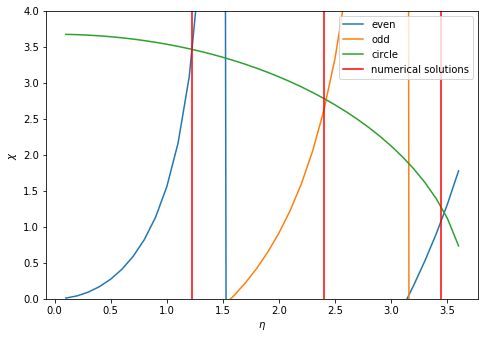

In [10]:
# Analytical solution

# Graphical solution
numerical_eta=scipy.sqrt(2*m*(-V0+ev2[:3]))/hbar1*w/2  # eta corresponding to our numerically found E

# Preparing the arrays 
z0=scipy.sqrt(2*m*(-V0))*(w/2)/hbar1
etas=np.arange(0.1,3.7,0.1)
chi_even=etas*scipy.tan(etas)
chi_odd=-etas/scipy.tan(etas)
circ=scipy.sqrt(z0**2-etas**2)

# Plotting
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(etas,chi_even,label='even')
ax.plot(etas,chi_odd,label='odd')
ax.plot(etas,circ,label='circle')
for i in range(2):
    ax.plot([numerical_eta[i],numerical_eta[i]],[0,4],color='red')
ax.plot([numerical_eta[2],numerical_eta[2]],[0,4],color='red',label='numerical solutions')
ax.set_ylim([0,4])
ax.set_xlabel("$\eta$")
ax.set_ylabel("$\chi$")
ax.legend()

In [11]:
from scipy import optimize
numerical_eta=scipy.sqrt(2*m*(-V0+ev2[:3]))/hbar1*w/2

# Two functions that take eta and return a combination of the tangents and the circle which is 0 at the intersection
def func_even(eta):
    m=1
    hbar1=1
    V0=-3
    w=3
    z0=scipy.sqrt(2*m*(-V0))*(w/2)/hbar1
    f=scipy.sqrt(z0**2-eta**2)-eta*(scipy.tan(eta))
    return f

def func_odd(eta):
    m=1
    hbar1=1
    V0=-3
    w=3
    z0=scipy.sqrt(2*m*(-V0))*(w/2)/hbar1
    f=scipy.sqrt(z0**2-eta**2)+eta/(scipy.tan(eta))
    return f

even_res=optimize.root(func_even,[numerical_eta[0],numerical_eta[2]])
eta_even=even_res.x
odd_res=optimize.root(func_odd,numerical_eta[1])
eta_odd=odd_res.x

eta=np.array([eta_even[0],eta_odd[0],eta_even[1]])
Ean=eta**2*hbar1**2/2/m/(w**2/4)+V0
print("Analytical and numerical solution for the bound energy states")
print(Ean)
print(ev2[0:3])
err=(ev2[0:3]-Ean)/Ean*100
print("Error: ", err,"%")

Analytical and numerical solution for the bound energy states
[-2.66403665 -1.69653774 -0.31870041]
[-2.66893083 -1.7198081  -0.36155051]
Error:  [ 0.18371293  1.37163799 13.445258  ] %


### b)
We can have 2 electrons per bound state (per energy level). In 3 dimensions there would be degeneration and we would have more electrons per energy level, but in one dimension we basically only have the main quantum number and the spin. 
So with 3 bound states we can have atoms with atomic numbers ranging from 1 to 6. The even numbers would have a total spin of 0, because they would have all their electrons paired, while odd atomic numbers would have spins of 1/2 or -1/2 with the highest occupied energy level only having 1 electron.

## Oppgave 3

In real life, $H_2$ is a very stable molecule, but $He_2$ does not exist. Each hydrogen atom has one electron in ground state and a hydrogen molecule will have 2 electrons in its ground state. 
A helium atom will have each 2 electrons in its ground state so in a molecule there will be 4 of them, filling up both the first and the second state, not providing as much of an energetic advantage.

Here we observe that the 1D hydrogen molecule is more stable than the 1D helium molecule, but surprisingly, in 1 dimension a helium molecule is preferable to separate helium atoms, unlike in 3 dimensions. 

[-2.67052791 -2.66764843 -1.73012878 -1.71040927 -0.40438288 -0.29989756
  0.00553829  0.0056195   0.0221257   0.02244208]
Binding energy of H_2:  -0.0031941721012778146
Binding energy of He_2:  -0.0006293845453573255


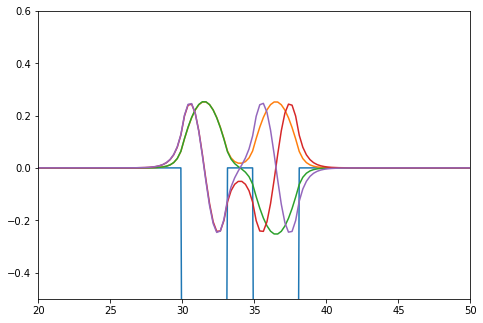

In [12]:
w=3
V0=-3
b=2
L,x,V=createPotential(w,V0,2,b,4)

ev3, psi=solveSchr(L,V)
print(ev3[0:10])

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x[1:-2],V[1:-2])
for j in range(4):
    ax.plot(x,psi[:,j])
    ax.set_xlim([20,50])
    ax.set_ylim([-0.5,0.6])
    
# H2
H_separate_e=2*ev2[0]
H_mol_e=2*ev3[0]
H_bind_e=H_mol_e-H_separate_e
print("Binding energy of H_2: ",H_bind_e)

# He2
He_separate_e=4*ev2[0]
He_mol_e=2*ev3[0]+2*ev3[1]
He_bind_e=He_mol_e-He_separate_e
print("Binding energy of He_2: ",He_bind_e)

## Oppgave 4

### a)  
For each atomic energy level there will be $N_w$ crystal energy levels, where $N_w$ is the number of atoms in the crystal.

In [13]:
w=3    # width of a well
V0=-3  # potential in a well
b=2    # distance between wells 
Nw=10  # number of wells
L,x,V=createPotential(w,V0,Nw,b,5)

ev, psi=solveSchr(L,V)
print("First 100 energies: ")
print(ev[0:100])

First 100 energies: 
[-2.67024849 -2.66992307 -2.66940906 -2.66874693 -2.66798922 -2.66719664
 -2.66643337 -2.6657619  -2.66523773 -2.66490455 -1.73131285 -1.72908906
 -1.7255589  -1.72097868 -1.71569043 -1.71010312 -1.70466633 -1.6998359
 -1.69603306 -1.69360078 -0.42762828 -0.41727925 -0.4004319  -0.37771852
 -0.35009263 -0.3189149  -0.28608656 -0.25422284 -0.2267745  -0.20780546
  0.0055813   0.0055813   0.02229157  0.02229158  0.05003871  0.05003874
  0.0886917   0.08869173  0.1380974   0.13809745  0.19808503  0.1980851
  0.26845241  0.26845257  0.34892079  0.3489213   0.43899442  0.43899768
  0.53723336  0.53731125  0.6069404   0.63002141  0.64373491  0.66453642
  0.70874462  0.75080947  0.77495497  0.80924211  0.86287375  0.9010786
  0.93180756  0.98395562  1.03588139  1.06931939  1.11535041  1.17736319
  1.2180971   1.25595346  1.32106519  1.37810464  1.39682811  1.51496239
  1.53099743  1.61334924  1.66124013  1.71399079  1.77331926  1.83155255
  1.89280488  1.95408309  2.01243

### b)
We calculate the bound energies for number of atoms $N_w$ between 2 and 100 and find the largest and smallest values in each energy bands. By plotting the boundaries and the widths of the energy bands for different $N_w$ we can see that they converge to a certain value.  

In [14]:
Eh=27.211 # 1 hartree energy unit is 27.211 eV
e_band_width=np.zeros([99,3])
en=np.zeros([99,6])
for Nw in range(2,101):
    L,x,V=createPotential(w,V0,Nw,b,4)
    ev, psi=solveSchr(L,V)
    e_band_width[Nw-2,0]=ev[Nw-1]-ev[0]
    e_band_width[Nw-2,1]=ev[2*Nw-1]-ev[Nw]
    e_band_width[Nw-2,2]=ev[3*Nw-1]-ev[2*Nw]
    en[Nw-2,:]=np.array([ev[0],ev[Nw-1],ev[Nw],ev[2*Nw-1],ev[2*Nw],ev[3*Nw-1]])
    
#print(e_band_width)


Text(0.5, 1.0, 'Energy band widths')

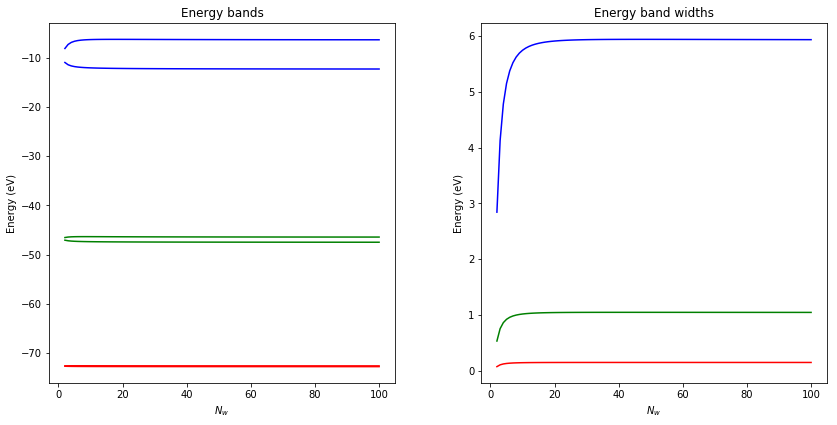

In [15]:
fig=plt.figure(figsize=[12,5])
col=['red','red','green','green','blue','blue']

ax1=fig.add_axes([0.05,0,0.4,1])
for i in range(6):
    ax1.plot(np.arange(2,101),en[:,i]*Eh,color=col[i])
ax1.set_xlabel("$N_w$")
ax1.set_ylabel("Energy (eV)")
ax1.set_title("Energy bands")

ax2=fig.add_axes([0.55,0,0.4,1])
for i in range(3):
    ax2.plot(np.arange(2,101),e_band_width[:,i]*Eh,color=col[2*i])
ax2.set_xlabel("$N_w$")
ax2.set_ylabel("Energy (eV)")
ax2.set_title("Energy band widths")

### c)
If every atom in the crystal has 4 electrons, there will be $4N_w$ electrons that will fill up the first $2N_w$ orbitals. Since each energy band has $N_w$ orbitals, the two first energy bands will be filled in the crystals ground state. From the previous plot, we can see that the gap between the second and third energy band is around 35 eV and this is more than a couple of eV, which means this crystal would be an insulator. 

### d)
According to Blochs theorem, the wave functions will have a sinusoidal form with an increasing number of nodes on the crystal, similar to the particle in a box, but here the box is exchanged for a crystal. This sinusoidal will also vary periodically with the width of the crystal's repeating element. 

Below is a plot of the first three wave functions on our crystal and we can see that it follows Blochs theorem. 

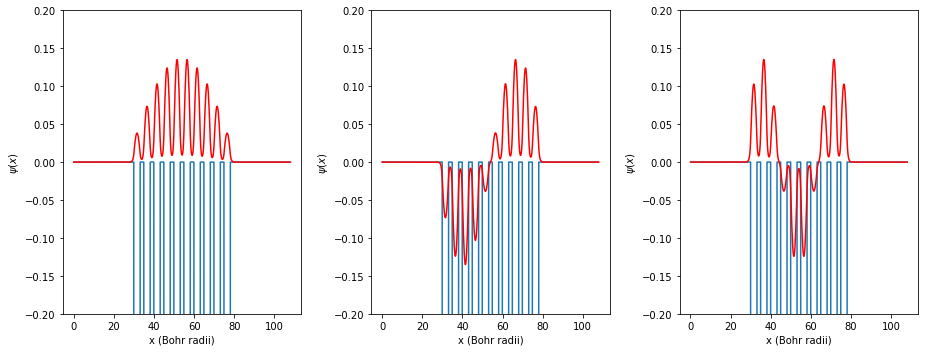

In [17]:
w=3    # width of a well
V0=-3  # potential in a well
b=2    # distance between wells 
Nw=10  # number of wells
L,x,V=createPotential(w,V0,Nw,b,5)
ev, psi=solveSchr(L,V)

fig, ax=plt.subplots(nrows=1,ncols=3,figsize=[13,5])
for j in range(3):
    ax[j].plot(x[1:-2],V[1:-2])
    ax[j].plot(x,psi[:,j],color='red')
    ax[j].set_ylim([-0.2,0.2])
    ax[j].set_xlabel("x (Bohr radii)")
    ax[j].set_ylabel("$\psi(x)$")
plt.tight_layout()